# Introduction à Pandas

Installer la bibliothèque

In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


La charger

In [2]:
import pandas as pd

Le format DataFrame

In [4]:
une_liste = ["élément un","2",3]
une_liste

['élément un', '2', 3]

In [26]:
mon_tableau_pandas = pd.DataFrame({"Colonne 1":[1,2,3,4],
                                "Colonne 5":["A","B","C","D"]})

In [9]:
mon_tableau_pandas

,Colonne 1,Colonne 5
0,1,A
1,2,B
2,3,C
3,4,D


In [10]:
type(mon_tableau_pandas)

pandas.core.frame.DataFrame

Manipuler le tableau

In [14]:
list(mon_tableau_pandas.columns)

['Colonne 1', 'Colonne 5']

In [13]:
list(mon_tableau_pandas.index)

[0, 1, 2, 3]

In [15]:
mon_tableau_pandas["Colonne 1"]

0    1
1    2
2    3
3    4
Name: Colonne 1, dtype: int64

In [16]:
type(mon_tableau_pandas["Colonne 1"])

pandas.core.series.Series

In [17]:
mon_tableau_pandas["Colonne 1"].dtype

dtype('int64')

In [18]:
mon_tableau_pandas["Colonne 5"].dtype

dtype('O')

Sélectionner un élément du tableau

In [22]:
mon_tableau_pandas.loc[1,"Colonne 1"]

2

In [23]:
mon_tableau_pandas.loc[1]

Colonne 1    2
Colonne 5    B
Name: 1, dtype: object

Modifier un élément

In [27]:
mon_tableau_pandas.loc[2,"Colonne 1"] = "Modifié"

In [28]:
mon_tableau_pandas

,Colonne 1,Colonne 5
0,1,A
1,2,B
2,Modifié,C
3,4,D


In [29]:
mon_tableau_pandas[(2,"Colonne 1")] = "Modifié"

In [30]:
mon_tableau_pandas

,Colonne 1,Colonne 5,"(2, Colonne 1)"
0,1,A,Modifié
1,2,B,Modifié
2,Modifié,C,Modifié
3,4,D,Modifié


Créer une nouvelle colonne

In [31]:
mon_tableau_pandas["Colonne 2"] = None

In [32]:
mon_tableau_pandas

,Colonne 1,Colonne 5,"(2, Colonne 1)",Colonne 2
0,1,A,Modifié,None
1,2,B,Modifié,None
2,Modifié,C,Modifié,None
3,4,D,Modifié,None


## Charger des données réelles

Comprendre les chemins de dossiers

`C:/Dossier 1/Sous dossier 1/Sous sous dossier 1/...`

Où on est : 

In [33]:
cd .

/Users/emilien/Dropbox/Python pour les SHS/Formations/2021-11 URFIST Toulouse/Module 3 - Pandas et statistiques 3h


In [38]:
data = pd.read_excel("../Data/anr-dos-depuis-2010-projets-finances-20211022-partenaires.xlsx")

Bibliothèque manquante

In [37]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


Taille du tableau

In [42]:
data.shape

(48330, 12)

Changer le nom des colonnes

In [48]:
data.columns

Index(['Projet.Code_Decision_ANR', 'Projet.Acronyme',
       'Projet.Partenaire.Code_Decision_ANR',
       'Projet.Partenaire.Est_coordinateur', 'Projet.Partenaire.Nom_organisme',
       'Projet.Partenaire.Categorie_organisme', 'Projet.Partenaire.Code_RNSR',
       'Projet.Partenaire.Responsable_scientifique.Nom',
       'Projet.Partenaire.Responsable_scientifique.Prenom',
       'Projet.Partenaire.Adresse.Ville', 'Projet.Partenaire.Adresse.Region',
       'Projet.Partenaire.Adresse.Pays'],
      dtype='object')

In [49]:
data.columns = ['Code', 'Acronyme','Decision','Coordinateur', 'Organisme',
                'CategorieOrg', 'Code_RNSR','RespoNom','RespoPrenom','Ville', 'Region','Pays']

Mettre une colonne en index

In [56]:
data = data.set_index("Code")

Explorer les données

Tous les éléments présents dans la colonne

In [73]:
data["Ville"].unique()

array([nan, 'AVIGNON', 'STRASBOURG', ..., 'Torcé', 'Monistrol-sur-Loire',
       'Landévant'], dtype=object)

Supprimer les lignes avec une valeur manquante

In [78]:
data["Ville"].dropna()

Code
ANR-21-SUSC-0004           AVIGNON
ANR-21-SUSC-0003        STRASBOURG
ANR-21-SUSC-0002       MONTPELLIER
ANR-21-SUSC-0002     Marsillargues
ANR-21-SUSC-0001    Gif sur Yvette
                         ...      
ANR-10-ALIA-0002           Quimper
ANR-10-ALIA-0001             Dijon
ANR-10-ALIA-0001              Bron
ANR-10-ALIA-0001             Dijon
ANR-10-AALI-0001           Roubaix
Name: Ville, Length: 43181, dtype: object

Remplacer les valeurs manquantes par un nom

In [82]:
data["Ville-reco"] = data["Ville"].fillna("Données absente")

In [86]:
data["Pays"].unique()

array(['Pologne', 'France',
       "Royaume-Uni de Grande-Bretagne et d'Irlande du Nord", 'Allemagne',
       'Espagne', 'Finlande', 'Turquie', 'Italie', 'Belgique', 'Danemark',
       nan, 'Viet Nam', "États-Unis d'Amérique", 'Japon', 'Norvège',
       'Luxembourg', 'Roumanie', 'Israël', 'Guadeloupe', 'Suède',
       'Suisse', 'Irlande', 'Estonie', 'Grèce', 'Afrique du Sud', 'Inde',
       'Nouvelle-Calédonie', 'Égypte', 'Thaïlande', "Côte d'Ivoire",
       'Martinique', 'Réunion', 'Polynésie française', 'Burkina Faso',
       'Pays-Bas', 'Lettonie', 'Canada', 'Portugal', 'Brésil', 'Russie',
       'Lituanie', 'Tchéquie', 'Autriche', 'Cambodge', 'Guyane française',
       'Singapour', 'Équateur', 'Chili', 'Sénégal', 'Mexique',
       'Madagascar', 'Ghana', 'Slovaquie', 'Slovénie', 'Argentine',
       'Barbade', 'Trinité-et-Tobago', 'Saint-Kitts-et-Nevis', 'Hongrie',
       'Chine', 'Chypre', 'Tunisie', 'Hong Kong', 'Taïwan', 'Australie',
       'Liban', 'Ouzbékistan', 'Corée (Républiq

Compter le nombre d'élément présent dans une colonne

In [87]:
data["Pays"].value_counts()

France                                                 39925
Allemagne                                                944
Royaume-Uni de Grande-Bretagne et d'Irlande du Nord      291
Espagne                                                  289
Italie                                                   275
                                                       ...  
Kazakhstan                                                 1
Cook (Îles)                                                1
Guinée                                                     1
Ouzbékistan                                                1
Gambie                                                     1
Name: Pays, Length: 122, dtype: int64

In [88]:
data["Pays"].value_counts()/len(data)*100

France                                                 82.609145
Allemagne                                               1.953238
Royaume-Uni de Grande-Bretagne et d'Irlande du Nord     0.602110
Espagne                                                 0.597972
Italie                                                  0.569005
                                                         ...    
Kazakhstan                                              0.002069
Cook (Îles)                                             0.002069
Guinée                                                  0.002069
Ouzbékistan                                             0.002069
Gambie                                                  0.002069
Name: Pays, Length: 122, dtype: float64

Les tableaux pandas permettent de faire des conditions pour sélectionner des lignes

In [96]:
data_fr = data[data["Pays"]=="France"]

Vérifier si un mot est contenu dans une case textuelle

In [99]:
data["Pays"].str.contains("France")

Code
ANR-21-SUSC-0004    False
ANR-21-SUSC-0004     True
ANR-21-SUSC-0004    False
ANR-21-SUSC-0004    False
ANR-21-SUSC-0004    False
                    ...  
ANR-10-AALI-0001     True
ANR-10-AALI-0001     True
ANR-10-AALI-0001     True
ANR-10-AALI-0001     True
ANR-10-AALI-0001     True
Name: Pays, Length: 48330, dtype: object

In [103]:
filtre = data["Pays"].str.contains("France").fillna(False)
data[filtre]["Ville"]

Code
ANR-21-SUSC-0004           AVIGNON
ANR-21-SUSC-0003        STRASBOURG
ANR-21-SUSC-0002       MONTPELLIER
ANR-21-SUSC-0002     Marsillargues
ANR-21-SUSC-0001    Gif sur Yvette
                         ...      
ANR-10-AALI-0001               NaN
ANR-10-AALI-0001               NaN
ANR-10-AALI-0001               NaN
ANR-10-AALI-0001               NaN
ANR-10-AALI-0001           Roubaix
Name: Ville, Length: 39925, dtype: object

### Charger un nouveau jeu de données

In [107]:
projets = pd.read_excel("../Data/anr-dos-depuis-2010-projets-finances-20211022-projets.xlsx")
projets.columns = ['Code', 'AAP', 'Acronyme',
       'Titrefr', 'Titreen',
       'Resumefr', 'Resumeen', 'AcroProg',
       'Montant']

Objectif : analyser les montants des projets

In [116]:
pd.isnull(projets["Montant"]).value_counts()

False    15865
Name: Montant, dtype: int64

Il n'y a pas de valeurs nulles

In [118]:
projets["Montant"].mean()

390163.59147622436

In [119]:
projets["Montant"].median()

350000.0

In [120]:
projets["Montant"].std()

227363.55708034773

In [121]:
projets["Montant"].describe()

count    1.586500e+04
mean     3.901636e+05
std      2.273636e+05
min      1.673000e+01
25%      2.371800e+05
50%      3.500000e+05
75%      5.019140e+05
max      2.700000e+06
Name: Montant, dtype: float64

Visualisation exploratoire

<AxesSubplot:ylabel='Frequency'>

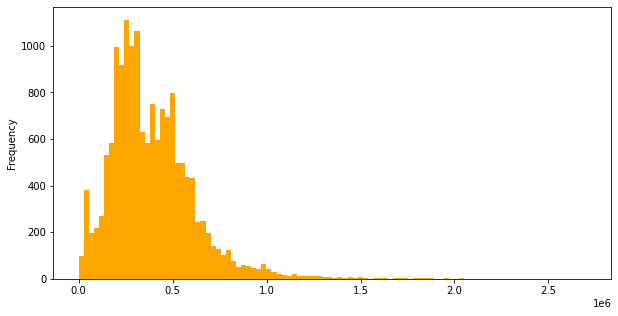

In [127]:
projets["Montant"].plot(kind="hist",
                        figsize=(10,5),
                        bins=100,
                        color="orange")

In [129]:
(projets["Montant"]>1000000).value_counts()

False    15586
True       279
Name: Montant, dtype: int64

In [130]:
filtre = projets["Montant"]>1000000
projets[filtre]

,Code,AAP,Acronyme,Titrefr,Titreen,Resumefr,Resumeen,AcroProg,Montant
7,ANR-21-SOIL-0002,2021,ABRESO,Abandonment and rebound: Societal views on lan...,Abandonment and rebound: Societal views on lan...,This project addresses soil and water sustaina...,NaN,Belmont Forum,1.228931e+06
8,ANR-21-SOIL-0001,2021,BLUEGEM,Biosphere and Land Use Exchanges with Groundwa...,Biosphere and Land Use Exchanges with Groundwa...,The interactions between groundwater (GW) and ...,NaN,Belmont Forum,1.076814e+06
25,ANR-21-PRIM-0016,2021,SafeAgroBee,Préserver la résilience des agroécosystèmes fa...,Safeguarding agroecosystem's resilience under ...,L'objectif global de SafeAgroBee est de contri...,The overall objective of SafeAgroBee is to con...,PRIMA 2020,1.184086e+06
28,ANR-21-PRIM-0013,2021,INTEL-IRRIS,Système Intelligent d'Irrigation à Bas-Coût po...,Intelligent Irrigation System for Low-cost Aut...,NaN,The project will provide the smallholder farme...,PRIMA 2020,1.051420e+06
30,ANR-21-PRIM-0011,2021,DROMAMED,Capitalisation du germplasme de maïs de la Méd...,Capitalization of Mediterranean maize germplas...,La sécheresse est le principal problème de l'a...,Drought is the main problem of agriculture wor...,PRIMA 2020,1.464981e+06
...,...,...,...,...,...,...,...,...,...
15841,ANR-10-BIOT-0002,2010,SAFE-BETA,Développement préclinique d'anticorps d'imager...,Preclinical development of molecular imaging a...,Le diabète résulte d'un déclin de la masse de ...,Diabetes results from an absolute or relative ...,BIOTECS,1.226891e+06
15844,ANR-10-BIOE-0007,2010,DIVA,Caractérisation des DIgestats et de leurs fili...,Characterization of DIgestate and evaluation o...,Dans un contexte environnemental où la pressio...,In an environmental context where the pressure...,BIOE,1.226387e+06
15847,ANR-10-BIOE-0004,2010,Algo-H2,"Optimisations génétiques, métaboliques, et pro...","Genetic, metabolic and process optimizations o...",L’objectif du projet est d’étudier la producti...,The aim of the project is to study the hydroge...,BIOE,1.240363e+06
15850,ANR-10-BIOE-0001,2010,GAMECO,Gazéification AMEliorée pour des applications ...,Improved Gasification for Heat and Power Appli...,La gazéification de biomasse en lit fluidisé b...,Air-blown fluidised bed biomass gasification i...,BIOE,1.015184e+06


### Quelques éléments sur matplotlib

In [132]:
import matplotlib.pyplot as plt

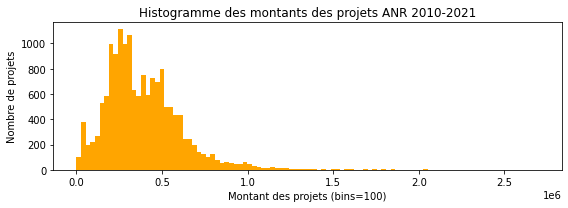

In [149]:
# Définir la figure
fig,graph = plt.subplots(1,1)

# Tracer la figure
projets["Montant"].plot(kind="hist",
                        figsize=(8,3),
                        bins=100,
                        color="orange",
                        ax=graph)

# Paramétrage de la figure
plt.title("Histogramme des montants des projets ANR 2010-2021")
plt.xlabel("Montant des projets (bins=100)")
plt.ylabel("Nombre de projets")

#Sauvegarder dans un fichier
plt.tight_layout()
plt.savefig("Histogramme_montant.png",dpi=300,facecolor="white")

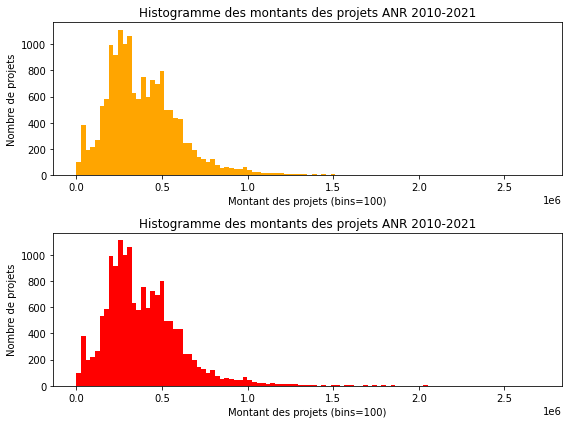

In [158]:
# Définir la figure
fig,graph = plt.subplots(2,1)

# Tracer la figure
projets["Montant"].plot(kind="hist",
                        figsize=(8,6),
                        bins=100,
                        color="orange",
                        ax=graph[0])

graph[0].set_title("Histogramme des montants des projets ANR 2010-2021")
graph[0].set_xlabel("Montant des projets (bins=100)")
graph[0].set_ylabel("Nombre de projets")

# Tracer la figure
projets["Montant"].plot(kind="hist",
                        bins=100,
                        color="red",
                        ax=graph[1])

# Paramétrage de la figure
graph[1].set_title("Histogramme des montants des projets ANR 2010-2021")
graph[1].set_xlabel("Montant des projets (bins=100)")
graph[1].set_ylabel("Nombre de projets")

#Sauvegarder dans un fichier
plt.tight_layout()
plt.savefig("Histogramme_montant.png",dpi=300,facecolor="white")

## Faire du recodage de colonne

Objectif : recoder ma colonne Montant en trois catégories 
- moins de 200000
- entre 200000 et 500000
- plus de 500000


Deux temps :
- définir une fonction qui recode une entrée
- l'appliquer à tout le tableau avec la méthode apply

In [166]:
def recodage_montant(m):
    if m < 200000:
        return "Petit projet"
    if m < 500000:
        return "Projet moyen"
    if m < 1000000:
        return "Gros projet"
    return "Très gros projet"

Autre façon d'écrire la fonction

In [ ]:
def recodage_montant(m):
    if m < 200000:
        return "Petit projet"
    elif m < 500000:
        return "Projet moyen"
    else:
        return "Gros projet"

L'appliquer à toutes les cellules d'un tableau

In [167]:
projets["Montant_recodes"] = projets["Montant"].apply(recodage_montant)

In [168]:
projets["Montant_recodes"].value_counts()

Projet moyen        9024
Gros projet         3782
Petit projet        2777
Très gros projet     282
Name: Montant_recodes, dtype: int64

Visualisation

<AxesSubplot:>

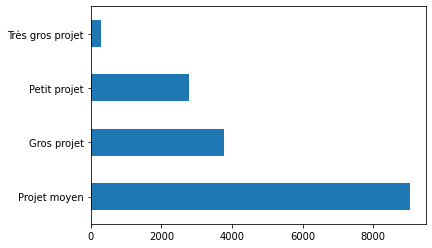

In [172]:
projets["Montant_recodes"].value_counts().plot(kind="barh")

### Tri à plat

In [173]:
pip install pyshs

Note: you may need to restart the kernel to use updated packages.


In [174]:
import pyshs

In [175]:
pyshs.tri_a_plat(projets,"Montant_recodes")

,Effectif,Pourcentage (%)
Gros projet,3782.0,23.8
Petit projet,2777.0,17.5
Projet moyen,9024.0,56.9
Très gros projet,282.0,1.8
Total,15865.0,100.0


Nombre de mots dans l'abstract

<AxesSubplot:ylabel='Frequency'>

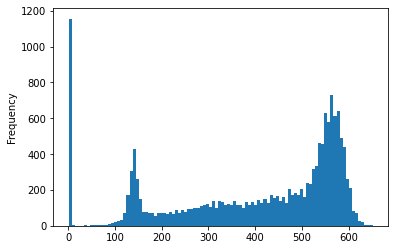

In [181]:
# Définir une fonction
def compter_mots(texte):
    return len(texte.split(" "))

# L'appliquer
projets["nb_mots_resume"] = projets["Resumefr"].fillna("").apply(compter_mots)
projets["nb_mots_resume"].plot(kind="hist",bins=100)